# <span style="color:orange"> Exercise 12.3 </span>
## <span style="color:green"> Task </span>
Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

In [4]:
import sys, os, os.path
import numpy as np
import tensorflow as tf
tf.get_logger().setLevel('INFO')
from matplotlib import pyplot as plt
from tensorflow.keras import layers, optimizers, models, utils
from tensorflow import keras
numbers_dir = "numbers"
model = keras.models.load_model("./models")
filecount = len([name for name in os.listdir(f'./{numbers_dir}/')])
images_filenames = [f"./{numbers_dir}/{i}.png" for i in range(filecount-1)]
model.summary()
print(images_filenames)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
module_wrapper_14 (ModuleWra (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_41 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_______________________________________________

In [5]:
# layer_index should be the index of a convolutional layer
layer_index=0

# retrieve weights from the convolutional hidden layer
filters, biases = model.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot filters
n_filters, ix = filters.shape[3], 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
# show the figure
plt.show()

(3, 3, 1, 32)


------------------------------------------------------------------------
----------------------  SHOWING HANDDRAWN IMAGES  ----------------------
------------------------------------------------------------------------

Iteration:  0
Filename:  ./numbers/0.png
Image size: 28x28


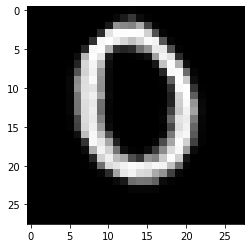

 
Iteration:  1
Filename:  ./numbers/1.png
Image size: 28x28


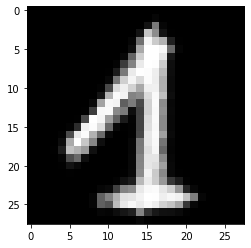

 
Iteration:  2
Filename:  ./numbers/2.png
Image size: 28x28


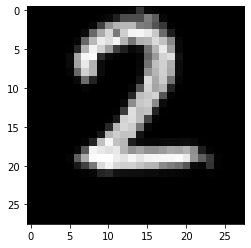

 
Iteration:  3
Filename:  ./numbers/3.png
Image size: 28x28


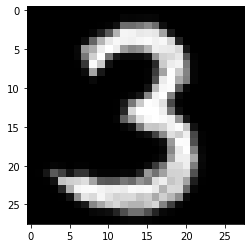

 
Iteration:  4
Filename:  ./numbers/4.png
Image size: 28x28


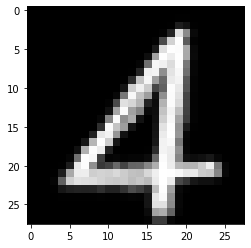

 
Iteration:  5
Filename:  ./numbers/5.png
Image size: 28x28


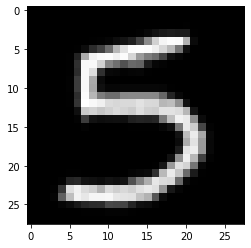

 
Iteration:  6
Filename:  ./numbers/6.png
Image size: 28x28


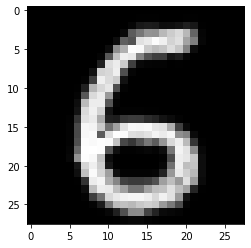

 
Iteration:  7
Filename:  ./numbers/7.png
Image size: 28x28


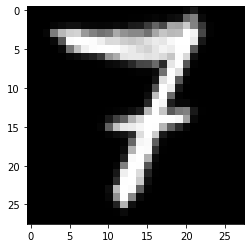

 
Iteration:  8
Filename:  ./numbers/8.png
Image size: 28x28


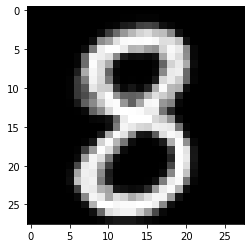

 
Iteration:  9
Filename:  ./numbers/9.png
Image size: 28x28


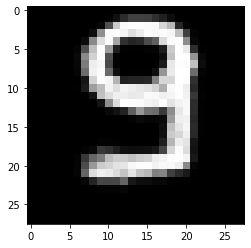

 
(10, 784)


In [6]:
# Load Data
from PIL import Image
import os
print("------------------------------------------------------------------------")
print("----------------------  SHOWING HANDDRAWN IMAGES  ----------------------")
print("------------------------------------------------------------------------\n")
data = []
for iter,filename in enumerate(images_filenames):
    digit_in = Image.open(filename).convert('L') # L = (8-bit pixels, black and white)
    ydim, xdim = digit_in.size
    print("Iteration: ",iter)
    print("Filename: ",filename)
    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    tempdata = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            tempdata[i,j]=pix[j,i]
    tempdata /= 255
    data.append(tempdata)
    plt.figure(figsize=(4,4))
    plt.imshow(tempdata, cmap='gray')
    plt.show()
    print(" ")
    
data = np.asfarray(data)
data = data.reshape(data.shape[0], 28*28)
print(data.shape)

In [7]:
utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


---------------------------------------------------------------------------
----------------------  PREDICTING HANDDRAWN IMAGES  ----------------------
---------------------------------------------------------------------------



2021-09-21 11:05:12.072870: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-21 11:05:12.074574: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3701000000 Hz


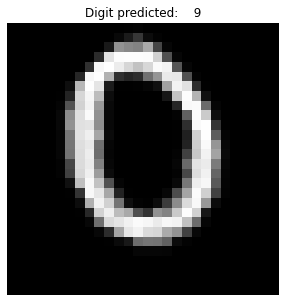

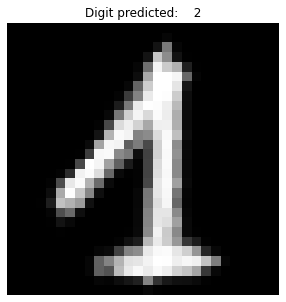

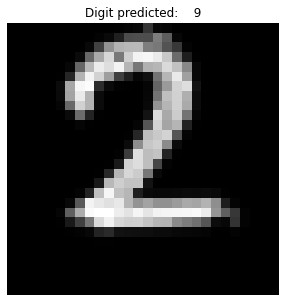

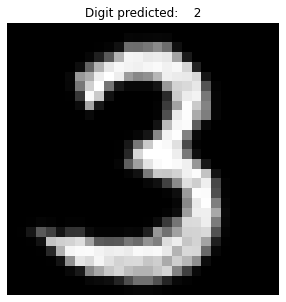

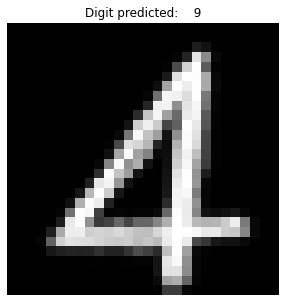

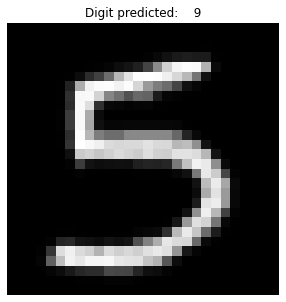

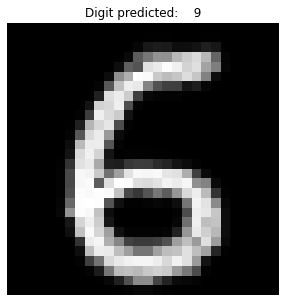

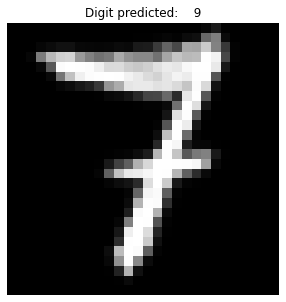

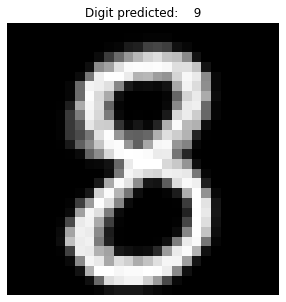

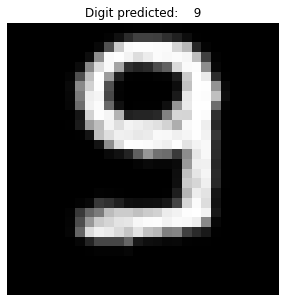

In [8]:
print("---------------------------------------------------------------------------")
print("----------------------  PREDICTING HANDDRAWN IMAGES  ----------------------")
print("---------------------------------------------------------------------------\n")
for d in data:
    d = d.reshape(1,28,28,1)
    pred_0 = model.predict(d)

    d = d.reshape(xdim,ydim)

    plt.figure(figsize=(5, 5))  
    plt.imshow(d, cmap='gray')    
    plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off')

<br>
It is possible to observe that the Convolutional Neural Network does not perform a good job, with an approximate precision of 20% in the prediction of the 10 handdrawn digits. For this purpose, I've decided to try to use the Deep Neural Network that had the best accuracy score in Exercise 12.1 to predict the same digits.

(10, 784)


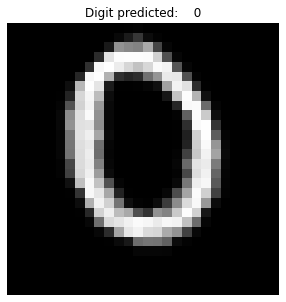

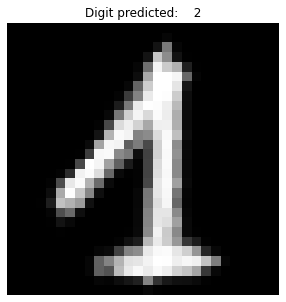

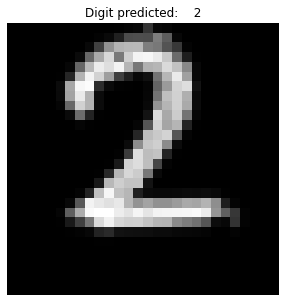

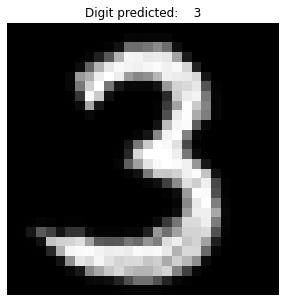

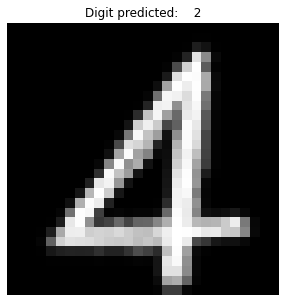

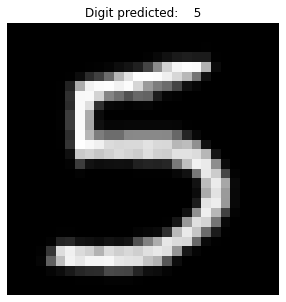

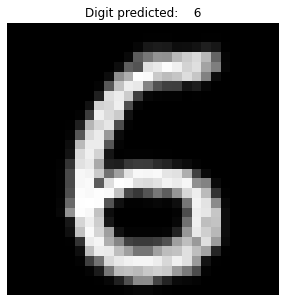

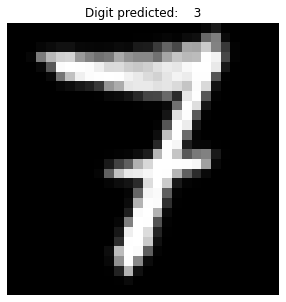

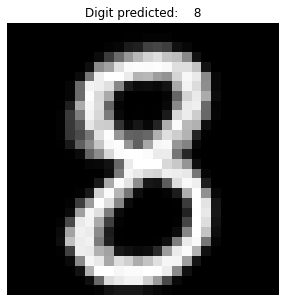

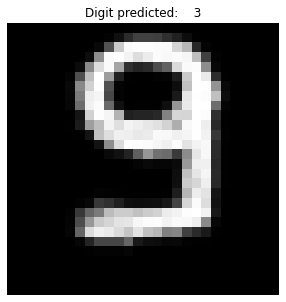

In [9]:
dnn_model = keras.models.load_model("dnn_model/")
print(data.shape)
pred_0 = dnn_model.predict(data)

for index,d in enumerate(data):
    plt.figure(figsize=(5, 5))
    d = d.reshape(28,28)
    plt.imshow(d, cmap='gray')    
    plt.title("Digit predicted:    {}".format(np.argmax(pred_0[index])))
    plt.axis('off')

#for d in data:   
#    print(d.shape)
#    pred_0 = dnn_model.predict(d)
#
#    plt.figure(figsize=(5, 5))  
#    plt.imshow(d, cmap='gray')    
#    plt.title("Digit predicted:    {}".format(np.argmax(pred_0[0])))
#    plt.axis('off') 

This model has an approximate precision of 60% out of the 10 digits, which is a much better result than the Convolutional Neural Network.